# Pandas 常用操作

## 常用方法
> 参考文献：[知乎，易执，常用函数](https://zhuanlan.zhihu.com/p/106722583)  
> 参考文献：[pandas 官方 api](https://pandas.pydata.org/pandas-docs/stable/reference/api/)

### 显示方法

In [1]:
import pandas as pd
import numpy as np

- head() 返回前 5 行
- info() 返回后 5 行

In [2]:
data = pd.DataFrame({'company':[np.NaN]+list("AACACABB"),
                     'salary':[43,8,28,42,33,20,48,25,39],
                     'age':[21,41,26,28,26,18,43,23,18]})

In [3]:
data.head()

,company,salary,age
0,NaN,43,21
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26


In [4]:
data.tail()

,company,salary,age
4,A,33,26
5,C,20,18
6,A,48,43
7,B,25,23
8,B,39,18


### 统计方法

- describe() 返回基本统计数据
- value_counts() 统计分类变量中每个类的数量
  - normalize （boolean, default False）:返回各类的占比
  - sort （boolean, default True）:是否对统计结果进行排序
  - ascending （boolean, default False）:是否升序排列

In [5]:
data.describe()

,salary,age
count,9.000000,9.000000
mean,31.777778,27.111111
std,12.804079,9.143911
min,8.000000,18.000000
25%,25.000000,21.000000
50%,33.000000,26.000000
75%,42.000000,28.000000
max,48.000000,43.000000


In [6]:
data['company'].value_counts()

A    4
B    2
C    2
Name: company, dtype: int64

In [7]:
data['company'].value_counts(normalize=True)

A    0.50
B    0.25
C    0.25
Name: company, dtype: float64

### 缺失值处理

- isna() 判断是否为 NaN
- any(),all(),empty() 判断某行/列情形
- dropna() 删除 NaN 所在行
- fillna() 用数据替换 NaN 值
  - value （scalar, dict, Series, or DataFrame）：用于填充缺失值的值
  - method （{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None）：缺失值的填充方式，常用的是bfill后面的值进行填充，ffill用前面的值进行填充
  - inplace （boolean, default False）：是否作用于原对象

In [8]:
data.isna()

,company,salary,age
0,True,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False


In [9]:
data.isna().any()

company     True
salary     False
age        False
dtype: bool

In [10]:
data.dropna()

,company,salary,age
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26
5,C,20,18
6,A,48,43
7,B,25,23
8,B,39,18


In [11]:
data.fillna('B')

,company,salary,age
0,B,43,21
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26
5,C,20,18
6,A,48,43
7,B,25,23
8,B,39,18


### 排序方法

- sort_index()：对数据按照索引进行排序
  - ascending （boolean, default True）：是否升序排列
  - inplace （boolean, default False）：是否作用于原对象
- sort_values()：按照某列进行排序
  - by （str or list of str）：作用于DataFrame时需要指定排序的列
  - ascending （boolean, default False）：是否升序排列

In [12]:
data.sort_index(ascending=False)

,company,salary,age
8,B,39,18
7,B,25,23
6,A,48,43
5,C,20,18
4,A,33,26
3,C,42,28
2,A,28,26
1,A,8,41
0,NaN,43,21


In [13]:
data.sort_values(by='salary')

,company,salary,age
1,A,8,41
5,C,20,18
7,B,25,23
2,A,28,26
4,A,33,26
8,B,39,18
3,C,42,28
0,NaN,43,21
6,A,48,43


### 数据修改与筛选方法

- astype()：修改字段的数据类型
- rename()：修改列名
  - columns （dict-like or function）：指定要修改的列名以及新的列名，一般以字典形式传入
  - inplace （boolean, default False）：是否作用于原对象
- set_index()：将DataFrame中的某一（多）个字段设置为索引
- reset_index()：重置索引，默认重置后的索引为0~len(df)-1
  - drop （boolean, default False）：是否丢弃原索引，具体看下方演示
  - inplace （boolean, default False）：是否作用于原对象
- drop_duplicates()：去掉重复值
- drop()：常用于删掉DataFrame中的某些字段
- isin()：常用于构建布尔索引
- where()：将不符合条件的值替换掉成指定值

In [14]:
data["age"] = data["age"].astype(int)

In [15]:
data.rename(columns={'age':'number'})

,company,salary,number
0,NaN,43,21
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26
5,C,20,18
6,A,48,43
7,B,25,23
8,B,39,18


In [16]:
data.set_index('company')

,salary,age
company,,
NaN,43,21
A,8,41
A,28,26
C,42,28
A,33,26
C,20,18
A,48,43
B,25,23
B,39,18


In [17]:
data.reset_index(drop=True)

,company,salary,age
0,NaN,43,21
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26
5,C,20,18
6,A,48,43
7,B,25,23
8,B,39,18


In [18]:
data['company'].drop_duplicates()

0    NaN
1      A
3      C
7      B
Name: company, dtype: object

In [19]:
data.drop(columns = ['salary'])

,company,age
0,NaN,21
1,A,41
2,A,26
3,C,28
4,A,26
5,C,18
6,A,43
7,B,23
8,B,18


In [20]:
data.loc[data['company'].isin(['A','C'])]

,company,salary,age
1,A,8,41
2,A,28,26
3,C,42,28
4,A,33,26
5,C,20,18
6,A,48,43


In [21]:
data['salary'].where(data.salary<=40,40)

0    40
1     8
2    28
3    40
4    33
5    20
6    40
7    25
8    39
Name: salary, dtype: int64

### 数据离散化

- cut()：将连续变量离散化
  - x （array-like）：需要进行离散化的一维数据
  - bins （int, sequence of scalars, or IntervalIndex）：设置需要分成的区间，可以指定区间数量，也可以指定间断点
  - labels （array or bool, optional）：设置区间的标签
- qcut()
  - x （array-like）：需要进行离散化的一维数据
  - q（integer or array of quantiles）：设置需要分成的区间，可以指定区间格式，也可以指定间断点
  - labels （array or boolean, default None）：设置区间的标签

In [22]:
pd.cut(data.salary,bins = 5)

0    (40.0, 48.0]
1    (7.96, 16.0]
2    (24.0, 32.0]
3    (40.0, 48.0]
4    (32.0, 40.0]
5    (16.0, 24.0]
6    (40.0, 48.0]
7    (24.0, 32.0]
8    (32.0, 40.0]
Name: salary, dtype: category
Categories (5, interval[float64]): [(7.96, 16.0] < (16.0, 24.0] < (24.0, 32.0] < (32.0, 40.0] < (40.0, 48.0]]

In [23]:
pd.cut(data.salary,bins = [0,10,20,30,40,50])

0    (40, 50]
1     (0, 10]
2    (20, 30]
3    (40, 50]
4    (30, 40]
5    (10, 20]
6    (40, 50]
7    (20, 30]
8    (30, 40]
Name: salary, dtype: category
Categories (5, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50]]

In [24]:
pd.cut(data.salary,bins = [0,10,20,30,40,50],labels = ['低','中下','中','中上','高'])

0     高
1     低
2     中
3     高
4    中上
5    中下
6     高
7     中
8    中上
Name: salary, dtype: category
Categories (5, object): ['低' < '中下' < '中' < '中上' < '高']

In [25]:
pd.qcut(data.salary,q = 3)

0     (40.0, 48.0]
1    (7.999, 27.0]
2     (27.0, 40.0]
3     (40.0, 48.0]
4     (27.0, 40.0]
5    (7.999, 27.0]
6     (40.0, 48.0]
7    (7.999, 27.0]
8     (27.0, 40.0]
Name: salary, dtype: category
Categories (3, interval[float64]): [(7.999, 27.0] < (27.0, 40.0] < (40.0, 48.0]]

### 数据透视

- pivot_table()：对DataFrame进行数据透视
  - values （column to aggregate, optional）：用于聚合运算的字段（数据透视的目标变量）
  - index （column, Grouper, array, or list of the previous）：类比于数据透视表中的行标签
  - columns （column, Grouper, array, or list of the previous）：类比于数据透视表中的列标签
  - aggfunc （ function, list of functions, dict, default numpy.mean）：对values进行什么聚合运算

In [26]:
data.pivot_table(values = 'salary',index = 'company',columns = 'age',aggfunc=np.mean)

age,18,23,26,28,41,43
company,,,,,,
A,NaN,NaN,30.5,NaN,8.0,48.0
B,39.0,25.0,NaN,NaN,NaN,NaN
C,20.0,NaN,NaN,42.0,NaN,NaN


## 行，列，元素操作
> 参考文献：[知乎，易执](https://zhuanlan.zhihu.com/p/100064394)  
> 参考文献：[pandas 官方 api](https://pandas.pydata.org/pandas-docs/stable/reference/api/)

### map() 方法
- 方法原型
  ```py
  Series.map(arg, na_action=None)
  ```
- 备注：只有 Series 对象拥有该方法

In [27]:
boolean=[True,False]
gender=["男","女"]
color=["white","black","yellow"]
data=pd.DataFrame({
    "height":np.random.randint(150,190,100),
    "weight":np.random.randint(40,90,100),
    "smoker":[boolean[x] for x in np.random.randint(0,2,100)],
    "gender":[gender[x] for x in np.random.randint(0,2,100)],
    "age":np.random.randint(15,90,100),
    "color":[color[x] for x in np.random.randint(0,len(color),100) ]
})
data

,height,weight,smoker,gender,age,color
0,181,43,True,女,41,black
1,152,75,False,男,88,black
2,150,61,False,男,57,yellow
3,151,66,False,男,81,yellow
4,177,54,False,女,88,white
...,...,...,...,...,...,...
95,158,49,False,男,16,black
96,168,65,True,女,78,black
97,158,43,False,女,36,yellow
98,182,67,False,女,66,black


In [28]:
data["gender"] = data["gender"].map({"男":1, "女":0})
data

,height,weight,smoker,gender,age,color
0,181,43,True,0,41,black
1,152,75,False,1,88,black
2,150,61,False,1,57,yellow
3,151,66,False,1,81,yellow
4,177,54,False,0,88,white
...,...,...,...,...,...,...
95,158,49,False,1,16,black
96,168,65,True,0,78,black
97,158,43,False,0,36,yellow
98,182,67,False,0,66,black


### apply() 方法
- 方法原型
  ```py
  DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
  ```
- 备注：Series DataFrame 均有该方法

In [29]:
data[["height","weight","age"]].apply(np.sum, axis=0)

height    16881
weight     6601
age        4883
dtype: int64

In [30]:
def BMI(series):
    weight = series["weight"]
    height = series["height"]/100
    BMI = weight/height**2
    return BMI

data["BMI"] = data.apply(BMI,axis=1)
data

,height,weight,smoker,gender,age,color,BMI
0,181,43,True,0,41,black,13.125362
1,152,75,False,1,88,black,32.461911
2,150,61,False,1,57,yellow,27.111111
3,151,66,False,1,81,yellow,28.946099
4,177,54,False,0,88,white,17.236426
...,...,...,...,...,...,...,...
95,158,49,False,1,16,black,19.628265
96,168,65,True,0,78,black,23.030045
97,158,43,False,0,36,yellow,17.224804
98,182,67,False,0,66,black,20.227026


### applymap() 方法
- 方法原型
  ```py
  DataFrame.applymap(func, na_action=None)
  ```
- 备注：apply 的简化版

In [31]:
df = pd.DataFrame({
        "A":np.random.randn(5),
        "B":np.random.randn(5),
        "C":np.random.randn(5),
        "D":np.random.randn(5),
        "E":np.random.randn(5),
    })
df.applymap(lambda x:"%.2f" % x)

,A,B,C,D,E
0,0.03,0.26,0.39,-0.22,-1.23
1,0.55,-0.12,-0.86,-0.24,0.77
2,-0.99,0.63,1.00,0.44,0.49
3,-1.39,0.49,-0.05,0.57,-0.04
4,-0.39,-0.27,-0.77,0.82,-0.97


## 表划分
> 参考文献：[知乎，易执](https://zhuanlan.zhihu.com/p/101284491)  
> 参考文献：[pandas 官方 api](https://pandas.pydata.org/pandas-docs/stable/reference/api/)

### groupby() 方法
- 方法原型
  ```py
  DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)
  ```
- 说明：Series 和 DataFrame 都有该方法

In [32]:
company=["A","B","C"]
data=pd.DataFrame({
    "company":[company[x] for x in np.random.randint(0,len(company),10)],
    "salary":np.random.randint(5,50,10),
    "age":np.random.randint(15,50,10)
})
data

,company,salary,age
0,A,27,16
1,C,46,37
2,C,36,30
3,C,43,47
4,B,39,35
5,C,26,37
6,C,10,18
7,A,26,36
8,B,5,32
9,C,47,43


In [33]:
data.groupby("company").mean()

,salary,age
company,,
A,26.500000,26.000000
B,22.000000,33.500000
C,34.666667,35.333333


### agg() 方法
- 方法原型
  ```py
  DataFrame.agg(func=None, axis=0, *args, **kwargs)
  ```
- 备注：Series DataFrame 均有该方法
- 常用函数
  |函数|min|max|sum|mean|median|std|var|count|
  |--|--|--|--|--|--|--|--|--|
  |用途|最小值|最大值|求和|均值|中位数|标准差|方差|计数|

In [34]:
data.groupby("company").agg('mean')

,salary,age
company,,
A,26.500000,26.000000
B,22.000000,33.500000
C,34.666667,35.333333


In [35]:
data.groupby('company').agg({'salary':'median','age':'mean'})

,salary,age
company,,
A,26.5,26.000000
B,22.0,33.500000
C,39.5,35.333333


In [36]:
avg_salary_dict = data.groupby('company')['salary'].mean().to_dict()
data['avg_salary'] = data['company'].map(avg_salary_dict)
data

,company,salary,age,avg_salary
0,A,27,16,26.500000
1,C,46,37,34.666667
2,C,36,30,34.666667
3,C,43,47,34.666667
4,B,39,35,22.000000
5,C,26,37,34.666667
6,C,10,18,34.666667
7,A,26,36,26.500000
8,B,5,32,22.000000
9,C,47,43,34.666667


### transform() 方法
- 方法原型
  ```py
  DataFrame.transform(func, axis=0, *args, **kwargs)
  ```
- 备注：Series DataFrame 均有该方法

In [37]:
data['avg_salary'] = data.groupby('company')['salary'].transform('mean')
data

,company,salary,age,avg_salary
0,A,27,16,26.500000
1,C,46,37,34.666667
2,C,36,30,34.666667
3,C,43,47,34.666667
4,B,39,35,22.000000
5,C,26,37,34.666667
6,C,10,18,34.666667
7,A,26,36,26.500000
8,B,5,32,22.000000
9,C,47,43,34.666667


## 表合并
> 参考文献：[知乎，晓伟，三个方法解析](https://zhuanlan.zhihu.com/p/70438557)  
> 参考文献：[pandas 官方 api](https://pandas.pydata.org/pandas-docs/stable/reference/api/)

### concat() 方法
- 方法原型
  ```py
  pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)
  ```
- 备注：此为静态方法，不是 Series 或 DataFrame 的成员方法

In [38]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

ignore_index参数：忽略原 index 序列

In [39]:
pd.concat([s1, s2], ignore_index=True)  # 忽略原有的 index

0    a
1    b
2    c
3    d
dtype: object

key参数：指定各自表名

In [40]:
pd.concat([s1, s2], keys=['s1', 's2'])  # 增加键

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

name参数：指定名称

In [41]:
pd.concat([s1, s2], keys=['s1', 's2'],
          names=['name', 'Row ID'])  # 增加列名

name  Row ID
s1    0         a
      1         b
s2    0         c
      1         d
dtype: object

index 与 column 参数：指定索引名

In [42]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [43]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'],index=[0,1])
df3    # 增加行列名

,letter,number,animal
0,c,3,cat
1,d,4,dog


join参数：连接方式，merge中详解

In [44]:
pd.concat([df1, df3], join="inner")    

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


axis参数：横向连接

In [45]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1) 

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


### append() 方法
- 方法原型
  ```py
  DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)
  ```
- 备注：Series DataFrame 都有 append() 方法
- 简化版 concat(), 只能纵向 append

In [46]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2)

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


### merge() 方法
- 方法原型
  ```py
  pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
  ```
- 备注：pandas 和 DataFrame 都有 merge() 方法

通过成员方法合并

In [47]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


通过静态方法合并

In [48]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'key': ['K1', 'K2', 'K3'],
                       'C': ['C1', 'C2', 'C3'],
                       'D': ['D1', 'D2', 'D3']}) 
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2


how 参数：设置合并模式
- 四种匹配模式
  |how|模式|
  |--|--|
  |inner(默认)|匹配交集|
  |outer|匹配并集|
  |left|以左表为准|
  |right|以右表为准|

In [49]:
pd.merge(left, right, on='key', how='outer')

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [50]:
pd.merge(left, right, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


# 数据清洗与准备

## 处理缺失值

In [51]:
string_data = pd.Series(['aardvark','art',np.nan,'avoc'])
string_data

0    aardvark
1         art
2         NaN
3        avoc
dtype: object

### .isnull() 判断缺失值
- 方法原型
  ```py
  DataFrame.isnull()
  ```
- 备注：Series 也有该方法

In [52]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

### dropna() 过滤缺失值
- 方法原型
  ```py
  DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
  ```
- 备注：Series 也有该方法

In [53]:
data = pd.Series([1,np.nan,3.4,np.nan,7])

In [54]:
data.dropna()

0    1.0
2    3.4
4    7.0
dtype: float64

In [55]:
data[data.notnull()]  # 等效

0    1.0
2    3.4
4    7.0
dtype: float64

In [56]:
data = pd.DataFrame([[1,6.4,3],[1,np.nan,np.nan],[np.nan,np.nan,np.nan],[np.nan,6.5,3]])
data

,0,1,2
0,1.0,6.4,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [57]:
data.dropna(how='all')  # 改变 how 参数

,0,1,2
0,1.0,6.4,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [58]:
data.dropna(how='all',axis=1)  # 改变轴向

,0,1,2
0,1.0,6.4,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [59]:
data.dropna(thresh=2)  # 指定 NaN 个数

,0,1,2
0,1.0,6.4,3.0
3,NaN,6.5,3.0


### .fillna() 替换 NaN 值
- 方法原型
  ```py
  DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
  ```
- 备注：Series 也有该方法

In [60]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4,1] = np.nan
df.iloc[:2,2] = np.nan
df

,0,1,2
0,0.105692,NaN,NaN
1,-1.799676,NaN,NaN
2,0.553794,NaN,0.711277
3,-0.518603,NaN,0.892012
4,0.639686,0.743727,0.398107
5,0.352758,0.467377,-2.534268
6,0.586283,-0.493887,-0.416289


In [61]:
df.fillna(0)

,0,1,2
0,0.105692,0.000000,0.000000
1,-1.799676,0.000000,0.000000
2,0.553794,0.000000,0.711277
3,-0.518603,0.000000,0.892012
4,0.639686,0.743727,0.398107
5,0.352758,0.467377,-2.534268
6,0.586283,-0.493887,-0.416289


In [62]:
df.fillna({1:0.5,2:1})

,0,1,2
0,0.105692,0.500000,1.000000
1,-1.799676,0.500000,1.000000
2,0.553794,0.500000,0.711277
3,-0.518603,0.500000,0.892012
4,0.639686,0.743727,0.398107
5,0.352758,0.467377,-2.534268
6,0.586283,-0.493887,-0.416289


In [63]:
df.fillna(method='backfill')

,0,1,2
0,0.105692,0.743727,0.711277
1,-1.799676,0.743727,0.711277
2,0.553794,0.743727,0.711277
3,-0.518603,0.743727,0.892012
4,0.639686,0.743727,0.398107
5,0.352758,0.467377,-2.534268
6,0.586283,-0.493887,-0.416289


## 数据转换

### 删除重复值 .duplicated()
- 方法原型
  ```py
  DataFrame.duplicated(subset=None, keep='first')
  ```
- 作用：返回每一行是否有重复值
- 备注：一般对象均有该方法

In [64]:
data = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                     'k2':[1,1,2,3,4,3,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,4
5,two,3
6,two,4


In [65]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

In [66]:
data.drop_duplicates()  # 删除上述为 True 的行

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,4
6,two,4


In [67]:
data.drop_duplicates(['k1'])

,k1,k2
0,one,1
1,two,1


### 数据转换 map() 方法
- 方法原型
  ```py
  Series.map(arg, na_action=None)
  ```
- 备注：只有 Series 对象拥有该方法

In [68]:
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami','corned beef','Bacon','pastrami','honey ham','nova lox'],
                     'ounces':[4,3,12,6,7.5,8,3,5,6]})
meat_to_animal = {'bacon':'pig','pulled pork':'pig','pastrami':'cow','corned beef':'cow','honey ham':'pig','nova lox':'salmon'}

In [69]:
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [70]:
data['food'].map(lambda x:meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 替代值 replace()
- 方法原型
  ```py
  DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
  ```

In [71]:
data = pd.Series([1,-999,2,-999,-1000,3],dtype=float)

In [72]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [73]:
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### 重命名轴索引 .rename()
- 方法原型
  ```py
  DataFrame.rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')[source]
  ```

In [74]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index = ['Ohio','Colorado','New York'],
                   columns = ['one','two','three','four'])

In [75]:
transform = lambda x:x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [76]:
data.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [77]:
data.rename(index={'OHIO':'INDIANA'},columns={'three':'peekaboo'})

,one,two,peekaboo,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


### 离散化和分箱
pandas.cut() 切分
- 方法原型
  ```py
  pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
  ```

In [78]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)

In [79]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [80]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [81]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

qcut() 基于样本分位数分箱
- 方法原型
  ```py
  pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
  ```

In [82]:
data = np.random.randn(1000)
pd.value_counts(pd.qcut(data,4))

(0.662, 3.134]                   250
(-0.00809, 0.662]                250
(-0.669, -0.00809]               250
(-2.8979999999999997, -0.669]    250
dtype: int64

### 检查和过滤异常值

In [83]:
data = pd.DataFrame(np.random.rand(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.515927,0.508417,0.490504,0.493336
std,0.290595,0.289424,0.297138,0.294175
min,0.000371,0.000369,0.000935,0.002013
25%,0.260270,0.260768,0.224788,0.234039
50%,0.535364,0.511517,0.490294,0.495404
75%,0.771449,0.754496,0.756698,0.749425
max,0.999243,0.998946,0.999242,0.999544


In [84]:
col = data[2]
col[np.abs(col)>0.99]

118    0.990313
249    0.990608
270    0.996406
431    0.994793
635    0.999242
719    0.996159
881    0.991753
918    0.997523
993    0.996450
Name: 2, dtype: float64

In [85]:
data[(np.abs(data)>0.999).any(1)]

,0,1,2,3
635,0.162980,0.779398,0.999242,0.568570
691,0.775874,0.454075,0.986569,0.999341
693,0.683251,0.695119,0.715039,0.999544
944,0.999243,0.451984,0.459924,0.353430


### 置换和随机抽样

In [86]:
df = pd.DataFrame(np.arange(20).reshape(5,4))

In [87]:
sampler = np.random.permutation(5)

In [88]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3
4,16,17,18,19
2,8,9,10,11


## 字符串操作

### 字符串对象方法

In [89]:
val = "a,b,  guido"
val.split(',')

['a', 'b', '  guido']

In [90]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [91]:
':'.join(pieces)

'a:b:guido'

In [92]:
val.index(',')

1

# 数据规整

## 分层索引
基本的索引操作

In [93]:
data = pd.Series(np.random.randn(9),
                index = [['a','a','a','b','b','c','c','d','d'],
                        [1,2,3,1,3,1,2,2,3]])
data

a  1    1.049289
   2   -1.248386
   3    0.105711
b  1    1.103122
   3   -0.034070
c  1    0.524290
   2    0.446840
d  2   -0.181035
   3   -0.133280
dtype: float64

In [94]:
data[['b','d']]

b  1    1.103122
   3   -0.034070
d  2   -0.181035
   3   -0.133280
dtype: float64

In [95]:
data.loc[:,2]

a   -1.248386
c    0.446840
d   -0.181035
dtype: float64

In [96]:
data.unstack()

,1,2,3
a,1.049289,-1.248386,0.105711
b,1.103122,NaN,-0.034070
c,0.524290,0.446840,NaN
d,NaN,-0.181035,-0.133280


In [97]:
data.unstack().stack()

a  1    1.049289
   2   -1.248386
   3    0.105711
b  1    1.103122
   3   -0.034070
c  1    0.524290
   2    0.446840
d  2   -0.181035
   3   -0.133280
dtype: float64

多重索引

In [98]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'],[1,2,1,2]],
                    columns = [['Ohio','Ohio','Colorado'],['Green','Red','Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [99]:
frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

### 重排序和层级排序

In [100]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [101]:
frame.swaplevel('key1','key2').sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 按层级进行汇总统计

In [102]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [103]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用 DataFrame 列进行索引

In [104]:
frame = pd.DataFrame({'a':range(7),'b':range(7,0,-1),
                     'c':['one','one','one','two','two','two','two'],
                     'd':[0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [105]:
frame2 = frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [106]:
frame.set_index(['c','d'],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [107]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 联合与合并数据集

### 联合重叠数据
.where()
  - 方法原型
    ```py
    numpy.where(condition[, x, y])
    ```

In [108]:
a = pd.Series([np.nan,2.5,0.0,3.5,4.5,np.nan],
             index = ['f','e','d','c','b','a'])
b = pd.Series([0.,np.nan,2.,np.nan,np.nan,5.],
             index = ['a','b','c','d','e','f'])

In [109]:
np.where(pd.isnull(a),b,a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

.combine_first()
- 方法原型
  ```py
  DataFrame.combine_first(other)
  ```
- 备注：pandas 对象均有该方法

In [110]:
df1 = pd.DataFrame({'a':[1.,np.nan,5.,np.nan],
                   'b':[np.nan,2.,np.nan,6.],
                   'c':range(2,18,4)})
df2 = pd.DataFrame({'a':[5.,4.,np.nan,3.,7.],
                   'b':[np.nan,3.,4.,6.,8.]})

In [111]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 重塑和透视
### 使用多层索引进行重塑

In [112]:
data = pd.DataFrame(np.arange(6).reshape((2,3)),
                   index = pd.Index(['Ohio','Colorado'],name='state'),
                   columns = pd.Index(['one','two','three'],name = 'number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [113]:
data.stack()  # 将列透视到行

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

## 可视化

## Series 可视化
### .plot() 方法
- 方法原型
  ```py
  Series.plot(*args, **kwargs)
  ```

<AxesSubplot:>

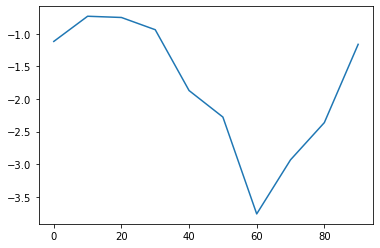

In [114]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

# DataFrame 可视化
## .plot() 方法
- 方法原型
  ```py
  DataFrame.plot(*args, **kwargs)
  ```

<AxesSubplot:>

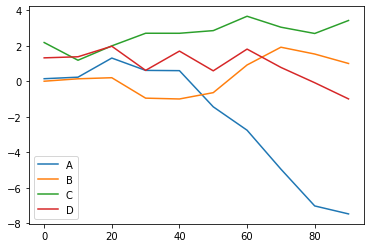

In [115]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns = ['A','B','C','D'],
                 index = np.arange(0,100,10))
df.plot()

# 数据聚合与分组操作
## GroupBy 机制

### groupby() 方法
- 方法原型
  ```py
  DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)
  ```

In [116]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.896396,1.402776
1,a,two,0.934997,-0.165136
2,b,one,-0.282780,0.822414
3,b,two,0.167936,-0.305571
4,a,one,0.477949,-0.035685


In [117]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.769781
b   -0.057422
Name: data1, dtype: float64

In [118]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.687173
      two     0.934997
b     one    -0.282780
      two     0.167936
Name: data1, dtype: float64

In [119]:
means.unstack()

key2,one,two
key1,,
a,0.687173,0.934997
b,-0.282780,0.167936


In [120]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005    0.934997
            2006   -0.282780
Ohio        2005    0.532166
            2006    0.477949
Name: data1, dtype: float64

In [121]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.769781,0.400652
b,-0.057422,0.258421


### 遍历各分组

In [122]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.896396  1.402776
1    a  two  0.934997 -0.165136
4    a  one  0.477949 -0.035685
b
  key1 key2     data1     data2
2    b  one -0.282780  0.822414
3    b  two  0.167936 -0.305571


In [123]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.896396  1.402776
4    a  one  0.477949 -0.035685
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.934997 -0.165136
('b', 'one')
  key1 key2    data1     data2
2    b  one -0.28278  0.822414
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.167936 -0.305571
